# HW 5 - Data manipulation

## Task 1.

1. Consider a given vector, how to add 1 to each element indexed by a second vector (be careful with repeated indices)? (Hint: checkout np.bincount function)
2. Considering a four dimensions array, how to get sum over the last two axis at once?
3. How to get the diagonal of a dot product? (Hint: there different ways to do that and they have different execution time)
4. Consider an array Z = [1,2,3,4,5,6,7,8,9,10,11,12,13,14], how to generate an array R = [[1,2,3,4], [2,3,4,5], [3,4,5,6], ..., [11,12,13,14]]? (Hint: checkout stride_tricks.as_strided function)
5. Consider a 16x16 array, how to get the block-sum (block size is 4x4)?
6. Create a structured array with x and y coordinates covering the [0,1]x[0,1] area. (Hint: checkout np.linspace and np.meshgrid functions).

In [1]:
# Adding 1 to elements indexed by a second vector
import numpy as np


v = np.array([10, 20, 30, 40, 50])
indices = np.array([1, 2, 2, 4])

counts = np.bincount(indices, minlength=len(v))
result = v + counts
print("Original vector:", v)
print("Indices:", indices)
print("Result:", result)

Original vector: [10 20 30 40 50]
Indices: [1 2 2 4]
Result: [10 21 32 40 51]


In [2]:
# Sum over last two axes of 4D array
arr = np.random.rand(2, 3, 4, 5)

sum_last_two = np.sum(arr, axis=(-2, -1))
print("Original shape:", arr.shape)
print("Result shape:", sum_last_two.shape)
print("Sample of result:\n", sum_last_two)

Original shape: (2, 3, 4, 5)
Result shape: (2, 3)
Sample of result:
 [[10.58821022  9.97236419 10.77176023]
 [12.98434043 10.79811785  9.89858552]]


In [13]:
# Diagonal of dot product
import numpy as np
import time

A = np.random.rand(3, 4)
B = np.random.rand(4, 3)

start1 = time.perf_counter()
dot_product = np.dot(A, B)
diag1 = np.diag(dot_product)
end1 = time.perf_counter()
time1 = end1 - start1

start2 = time.perf_counter()
diag2 = np.einsum('ij,ji->i', A, B)
end2 = time.perf_counter()
time2 = end2 - start2

print("Dot product:\n", dot_product)
print("Method 1 result:", diag1)
print(f"Method 1 execution time: {time1:.6f} seconds")
print("Method 2 result:", diag2)
print(f"Method 2 execution time: {time2:.6f} seconds")
print("Results match:", np.allclose(diag1, diag2))

Dot product:
 [[1.26517566 0.64700071 0.34253829]
 [0.64723001 0.55536276 0.2288446 ]
 [1.23785485 0.73834587 0.38493902]]
Method 1 result: [1.26517566 0.55536276 0.38493902]
Method 1 execution time: 0.000187 seconds
Method 2 result: [1.26517566 0.55536276 0.38493902]
Method 2 execution time: 0.000132 seconds
Results match: True


In [4]:
# Generate sliding window array
from numpy.lib.stride_tricks import as_strided


Z = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])
window_size = 4
n_windows = len(Z) - window_size + 1

stride = Z.strides[0]
R = as_strided(Z, shape=(n_windows, window_size), strides=(stride, stride))

print("Original array:", Z)
print("Result:\n", R)

Original array: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]
Result:
 [[ 1  2  3  4]
 [ 2  3  4  5]
 [ 3  4  5  6]
 [ 4  5  6  7]
 [ 5  6  7  8]
 [ 6  7  8  9]
 [ 7  8  9 10]
 [ 8  9 10 11]
 [ 9 10 11 12]
 [10 11 12 13]
 [11 12 13 14]]


In [5]:
# Block-sum of 16x16 array
arr = np.random.rand(16, 16)
block_size = 4

n_blocks = 16 // block_size
reshaped = arr.reshape(n_blocks, block_size, n_blocks, block_size)
block_sums = reshaped.sum(axis=(1, 3))

print("Original shape:", arr.shape)
print("Block sums shape:", block_sums.shape)
print("Sample of block sums:\n", block_sums)

Original shape: (16, 16)
Block sums shape: (4, 4)
Sample of block sums:
 [[8.24973429 8.67123251 7.47263282 8.39941014]
 [7.98641081 8.19598564 9.23403926 9.57735795]
 [8.27814441 9.19857185 7.21641814 9.74225227]
 [7.61546604 7.61918469 7.50823378 9.38577022]]


In [12]:
# Structured array with x,y coordinates covering the [0,1]x[0,1] area
x = np.linspace(0, 1, 5)
y = np.linspace(0, 1, 5)
X, Y = np.meshgrid(x, y)

coords = np.zeros(X.size, dtype=[('x', float), ('y', float)])
coords['x'] = X.ravel()
coords['y'] = Y.ravel()

print("Coordinate grid shape:", X.shape)
print("Structured array size:", coords.size)
print("Coordinates:\n", coords)

Coordinate grid shape: (5, 5)
Structured array size: 25
Coordinates:
 [(0.  , 0.  ) (0.25, 0.  ) (0.5 , 0.  ) (0.75, 0.  ) (1.  , 0.  )
 (0.  , 0.25) (0.25, 0.25) (0.5 , 0.25) (0.75, 0.25) (1.  , 0.25)
 (0.  , 0.5 ) (0.25, 0.5 ) (0.5 , 0.5 ) (0.75, 0.5 ) (1.  , 0.5 )
 (0.  , 0.75) (0.25, 0.75) (0.5 , 0.75) (0.75, 0.75) (1.  , 0.75)
 (0.  , 1.  ) (0.25, 1.  ) (0.5 , 1.  ) (0.75, 1.  ) (1.  , 1.  )]


## Task 2.

1. Generate a generic 2D Gaussian-like array (Hint: checkout np.linspace function). Visualize the results.
2. How to tell if a given 2D array has null columns?
3. Consider the vector [1, 2, 3, 4, 5], how to build a new vector with 3 consecutive zeros interleaved between each value?
4. Considering a 15x5 matrix, extract rows with unequal values (e.g. [1,2,2,3,4]).
5. Given an arbitrary number of vectors, build the cartesian product (every combinations of every item).
6. Consider a random vector with shape (100,2) representing coordinates, find point by point distances.

In [15]:
# Check for null columns in 2D array
def has_null_columns(array_2d):
    arr = np.array(array_2d)
    null_cols = np.all(arr == 0, axis=0)
    return null_cols, np.any(null_cols)


test_array = np.array([[1, 0, 3],
                      [2, 0, 4],
                      [3, 0, 5]])

null_columns, has_null = has_null_columns(test_array)
print(f"Null columns mask: {null_columns}")
print(f"Has null columns: {has_null}")

Null columns mask: [False  True False]
Has null columns: True


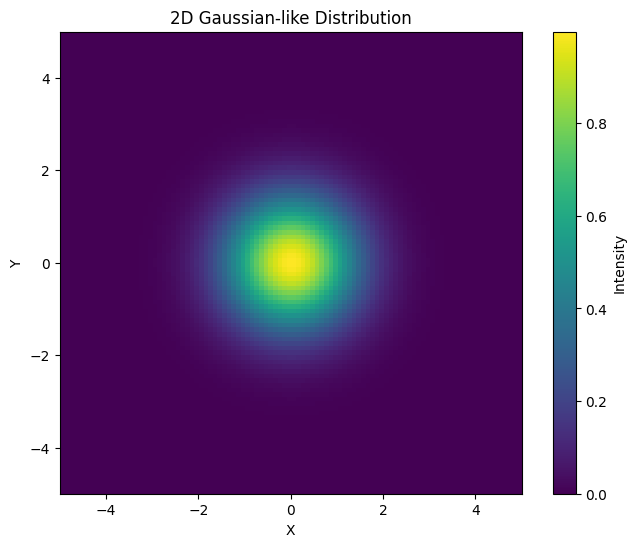

In [14]:
# Generate and visualize 2D Gaussian-like array
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

Z = np.exp(-(X**2 + Y**2) / 2)

plt.figure(figsize=(8, 6))
plt.imshow(Z, extent=[-5, 5, -5, 5])
plt.colorbar(label='Intensity')
plt.title('2D Gaussian-like Distribution')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [16]:
# Interleave zeros in vector
original = np.array([1, 2, 3, 4, 5])
n_zeros = 3

result = np.zeros(len(original) + (len(original)-1)*n_zeros, dtype=original.dtype)
result[0::n_zeros+1] = original

print("Original vector:", original)
print("With 3 zeros interleaved:", result)

Original vector: [1 2 3 4 5]
With 3 zeros interleaved: [1 0 0 0 2 0 0 0 3 0 0 0 4 0 0 0 5]


In [25]:
# Extract rows with unequal values from 15x5 matrix
matrix = np.random.randint(0, 5, (15, 5))

unequal_mask = np.apply_along_axis(lambda x: len(np.unique(x)) > 1, 1, matrix)
result = matrix[unequal_mask]

print("Original matrix shape:", matrix.shape)
print("Rows with unequal values shape:", result.shape)
print("Rows with unequal values:\n", result)

Original matrix shape: (15, 5)
Rows with unequal values shape: (15, 5)
Rows with unequal values:
 [[2 2 4 4 4]
 [4 4 0 2 1]
 [3 0 3 4 1]
 [1 0 1 2 1]
 [3 4 3 1 2]
 [4 3 1 2 3]
 [0 4 1 4 2]
 [0 2 4 4 3]
 [2 0 1 2 0]
 [1 1 3 4 0]
 [0 1 2 0 4]
 [4 3 1 0 0]
 [2 4 2 2 4]
 [4 4 0 0 4]
 [0 2 3 0 0]]


In [26]:
# Cartesian product of arbitrary vectors
from itertools import product


v1 = [1, 2]
v2 = [3, 4, 5]
v3 = [6, 7]
vectors = [v1, v2, v3]

cartesian = np.array(list(product(*vectors)))

print(f"Input vectors: {vectors}")
print(f"Cartesian product shape: {cartesian.shape}")
print("Cartesian product:\n", cartesian)

Input vectors: [[1, 2], [3, 4, 5], [6, 7]]
Cartesian product shape: (12, 3)
Cartesian product:
 [[1 3 6]
 [1 3 7]
 [1 4 6]
 [1 4 7]
 [1 5 6]
 [1 5 7]
 [2 3 6]
 [2 3 7]
 [2 4 6]
 [2 4 7]
 [2 5 6]
 [2 5 7]]


In [27]:
# Point-by-point distances for coordinates
coords = np.random.random((100, 2))

diffs = np.diff(coords, axis=0)
distances = np.sqrt(np.sum(diffs**2, axis=1))

print("Coordinates shape:", coords.shape)
print("Distances shape:", distances.shape)
print("\nCoordinates:\n", coords)
print("\nDistances:", distances)

Coordinates shape: (100, 2)
Distances shape: (99,)

Coordinates:
 [[0.89012303 0.64718461]
 [0.5392996  0.82280709]
 [0.31497145 0.50980375]
 [0.37953329 0.13915558]
 [0.96093217 0.82555644]
 [0.96892471 0.30336695]
 [0.27162695 0.15044158]
 [0.05656234 0.43931013]
 [0.09920559 0.49591016]
 [0.20383087 0.80273058]
 [0.32852265 0.14540414]
 [0.0921388  0.1371402 ]
 [0.62710966 0.62594149]
 [0.42336204 0.15204147]
 [0.10601936 0.69165414]
 [0.02296886 0.3285594 ]
 [0.56281187 0.30136891]
 [0.31315446 0.91036018]
 [0.10609457 0.59332387]
 [0.68388052 0.85742272]
 [0.83527777 0.14330068]
 [0.57713431 0.00987258]
 [0.14873936 0.96257261]
 [0.56085122 0.42347921]
 [0.68087208 0.92620518]
 [0.46607835 0.03601992]
 [0.13797541 0.41088992]
 [0.00861876 0.26786322]
 [0.13194569 0.74183617]
 [0.34672097 0.97339656]
 [0.80046819 0.9669417 ]
 [0.75482673 0.07781618]
 [0.64551659 0.0174962 ]
 [0.32254097 0.9927685 ]
 [0.35684854 0.66979769]
 [0.43239473 0.57121362]
 [0.2013043  0.63292442]
 [0.64256

## Task 3.
Check the Bag-of-words dataset from UCI repository (https://archive.ics.uci.edu/ml/datasets/Bag+of+Words). Try to load at least one text collection from the dataset. Explore the collection:

1. Provide basic statistics about the collection (e.g. the minimal, maximal and average number of words in a text and etc).
2. Create a function, which allows to build a histogram of the N most frequent words in selected text.
3. Create f function, which allows to build a scatter plot of the N most frequent words against the files, where they can be found

Since the collection is big, you might run into some trouble with performance. Try to optimize your work by using sparse matrices.

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from collections import Counter
import requests
import io
import gzip

In [43]:
def load_bag_of_words_collection(collection_name="enron"):
    base_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/bag-of-words/"
    file_mapping = {
        "enron": "docword.enron.txt.gz",
        "nips": "docword.nips.txt.gz",
        "kos": "docword.kos.txt.gz",
        "nytimes": "docword.nytimes.txt.gz",
        "pubmed": "docword.pubmed.txt.gz"
    }
    vocab_file = "vocab.{}.txt".format(collection_name)
    docword_file = file_mapping[collection_name]

    vocab_url = base_url + vocab_file
    vocab_response = requests.get(vocab_url)
    vocab = vocab_response.text.splitlines()

    docword_url = base_url + docword_file
    docword_response = requests.get(docword_url)

    with gzip.GzipFile(fileobj=io.BytesIO(docword_response.content)) as gz:
        lines = gz.readlines()

    D = int(lines[0].decode('utf-8').strip())
    W = int(lines[1].decode('utf-8').strip())
    NNZ = int(lines[2].decode('utf-8').strip())

    doc_ids = []
    word_ids = []
    counts = []
    for line in lines[3:]:
        doc_id, word_id, count = map(int, line.decode('utf-8').strip().split())
        doc_ids.append(doc_id - 1)
        word_ids.append(word_id - 1)
        counts.append(count)

    sparse_data = csr_matrix((counts, (doc_ids, word_ids)), shape=(D, W))
    return sparse_data, vocab, D, W, NNZ


sparse_data, vocab, D, W, NNZ = load_bag_of_words_collection("enron")
print(f"Number of documents (D): {D}")
print(f"Number of unique words (W): {W}")
print(f"Number of nonzero entries (NNZ): {NNZ}")

Number of documents (D): 39861
Number of unique words (W): 28102
Number of nonzero entries (NNZ): 3710420


In [44]:
def compute_basic_stats(sparse_data):
    word_counts_per_doc = sparse_data.sum(axis=1).A1
    
    min_words = np.min(word_counts_per_doc)
    max_words = np.max(word_counts_per_doc)
    avg_words = np.mean(word_counts_per_doc)
    total_words = np.sum(word_counts_per_doc)
    
    print(f"Minimum number of words in a document: {min_words}")
    print(f"Maximum number of words in a document: {max_words}")
    print(f"Average number of words per document: {avg_words:.2f}")
    print(f"Total number of words across all documents: {total_words}")
    
    return word_counts_per_doc


word_counts_per_doc = compute_basic_stats(sparse_data)

Minimum number of words in a document: 11
Maximum number of words in a document: 4873
Average number of words per document: 160.86
Total number of words across all documents: 6412172


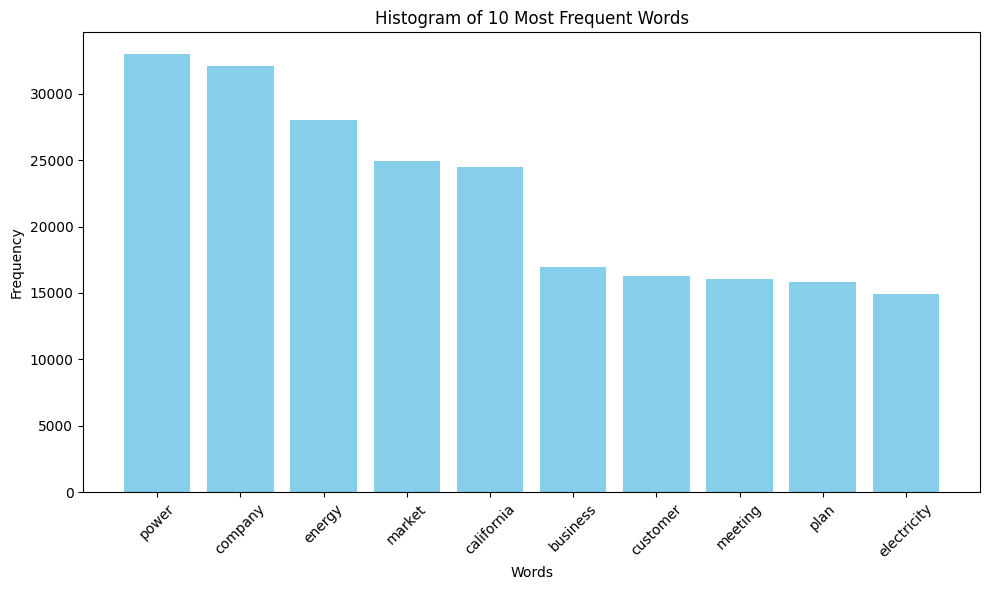

In [45]:
def plot_word_frequency_histogram(sparse_data, vocab, N=10):
    word_frequencies = sparse_data.sum(axis=0).A1

    top_n_indices = np.argsort(word_frequencies)[::-1][:N]
    top_n_words = [vocab[i] for i in top_n_indices]
    top_n_freqs = word_frequencies[top_n_indices]

    plt.figure(figsize=(10, 6))
    plt.bar(top_n_words, top_n_freqs, color='skyblue')
    plt.title(f"Histogram of {N} Most Frequent Words")
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


plot_word_frequency_histogram(sparse_data, vocab, N=10)

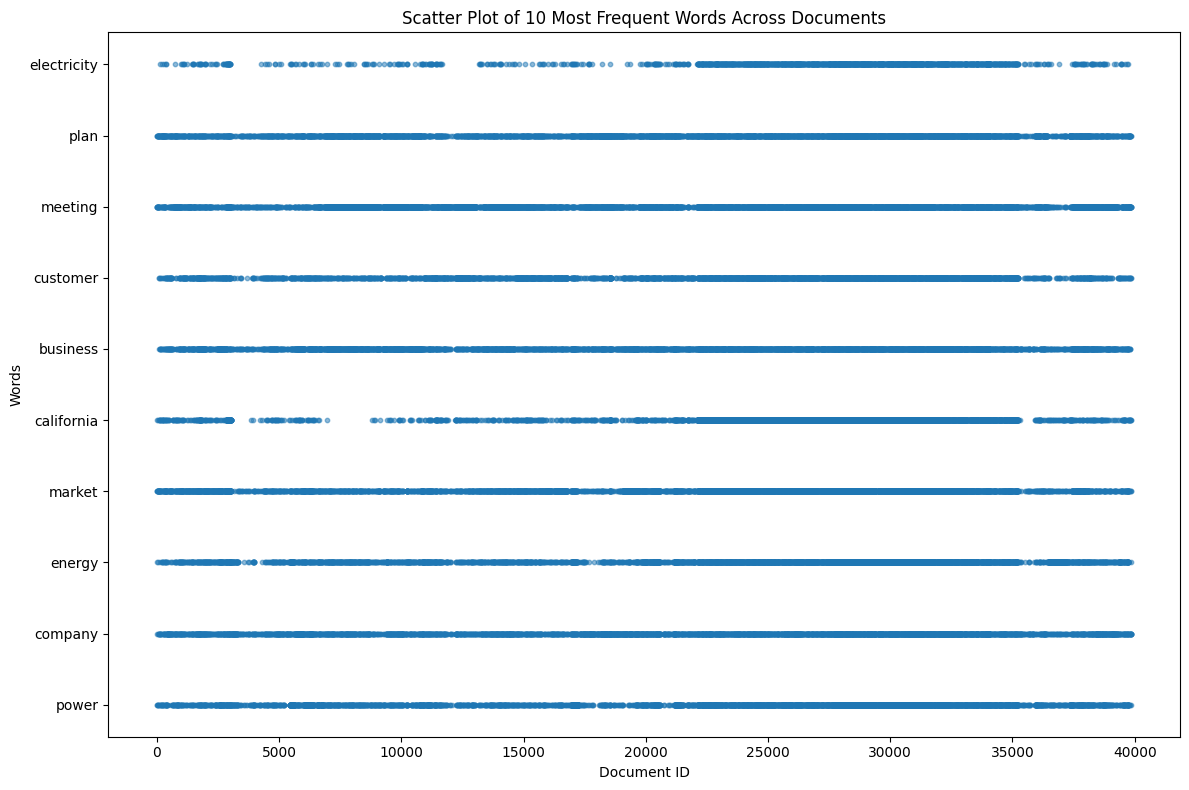

In [46]:
def plot_word_document_scatter(sparse_data, vocab, N=10):
    word_frequencies = sparse_data.sum(axis=0).A1
    top_n_indices = np.argsort(word_frequencies)[::-1][:N]
    top_n_words = [vocab[i] for i in top_n_indices]

    doc_ids = []
    word_labels = []
    for i, word_idx in enumerate(top_n_indices):
        nonzero_docs = sparse_data[:, word_idx].nonzero()[0]
        doc_ids.extend(nonzero_docs)
        word_labels.extend([top_n_words[i]] * len(nonzero_docs))

    plt.figure(figsize=(12, 8))
    plt.scatter(doc_ids, word_labels, alpha=0.5, s=10)
    plt.title(f"Scatter Plot of {N} Most Frequent Words Across Documents")
    plt.xlabel("Document ID")
    plt.ylabel("Words")
    plt.tight_layout()
    plt.show()


plot_word_document_scatter(sparse_data, vocab, N=10)